# Eigenfaces Testing

imports

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from PIL import Image

olivetti faces (can be changed)

In [39]:
# Load the Olivetti faces dataset
data = fetch_olivetti_faces()
faces = data.data  # Each row corresponds to a flattened 64x64 image
n_samples, n_features = faces.shape

In [40]:
# Compute PCA to get eigenfaces
n_components = 40  # Number of eigenfaces to compute
pca = PCA(n_components=n_components, whiten=True)
pca.fit(faces)

PCA(n_components=40, whiten=True)

In [41]:
def load_and_preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    # Resize the image to 64x64 pixels
    img = img.resize((64, 64), Image.ANTIALIAS)
    # Convert the image to a numpy array
    img_data = np.array(img, dtype='float32')
    # Normalize the pixel values to [0, 1]
    img_data /= 255.0
    # Flatten the image to a 1D array
    img_flat = img_data.flatten()
    return img_flat

### Select input image below

In [42]:
image_path = 'facecrop.jpg'
original_face = load_and_preprocess_image(image_path)

/var/folders/34/rtsrmtnj32v8xdvctf7ydwdw0000gn/T/ipykernel_59147/3289304696.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((64, 64), Image.ANTIALIAS)


In [43]:
# Project the face onto the eigenfaces to get the coefficients
coefficients = pca.transform(original_face.reshape(1, -1))

# Modify the coefficients slightly to morph the face
delta = np.random.normal(scale=0.1, size=coefficients.shape)
new_coefficients = coefficients + delta

# Reconstruct the new face from the modified coefficients
morphed_face = pca.inverse_transform(new_coefficients)

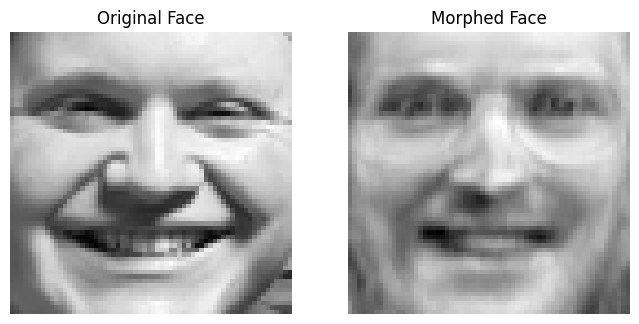

In [44]:
# Plot the original and morphed faces side by side
plt.figure(figsize=(8, 4))

# Original face
plt.subplot(1, 2, 1)
plt.imshow(original_face.reshape(64, 64), cmap='gray')
plt.title('Original Face')
plt.axis('off')

# Morphed face
plt.subplot(1, 2, 2)
plt.imshow(morphed_face.reshape(64, 64), cmap='gray')
plt.title('Morphed Face')
plt.axis('off')

plt.show()